**Dataset lnk - https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data**

In [ ]:
!!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rishov0007
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense ,BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = 'new-plant-diseases-dataset/test/test'

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
class_names = validation_set.class_names
class_name_dict = {i: name for i, name in enumerate(class_names)}

print(class_name_dict)
num_classes = len(class_names)
print(num_classes)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

# **InceptionResNetV2**

---



In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

# Load pretrained InceptionResNetV2
pretained = InceptionResNetV2(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

InceptionResNetV2_model = Sequential([
    pretained,
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

InceptionResNetV2_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
InceptionResNetV2_model.summary()

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 1536)           │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,544,198 (208.07 MB)

 Trainable params: 54,483,654 (207.84 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history_eff = InceptionResNetV2_model.fit(x=training_set,validation_data=validation_set,epochs=10, callbacks=[early_stop])

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1543s 626ms/step - accuracy: 0.6900 - loss: 1.2265 - val_accuracy: 0.9776 - val_loss: 0.1092
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1320s 594ms/step - accuracy: 0.9687 - loss: 0.1328 - val_accuracy: 0.9826 - val_loss: 0.0980
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1304s 594ms/step - accuracy: 0.9799 - loss: 0.0912 - val_accuracy: 0.9838 - val_loss: 0.2179
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1365s 621ms/step - accuracy: 0.9836 - loss: 0.0689 - val_accuracy: 0.9932 - val_loss: 0.0369
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1342s 594ms/step - accuracy: 0.9888 - loss: 0.0479 - val_accuracy: 0.9937 - val_loss: 0.0323
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1341s 594ms/step - accuracy: 0.9905 - loss: 0.0441 - val_accuracy: 0.9949 - val_loss: 0.0219
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1342s 594ms/step - accuracy: 0.9905 - loss: 0.0423 - val_accuracy: 0.9912 - val_loss: 0.0425
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1342s 594ms/s

**Train**

In [ ]:
import json
history_dict = history_eff.history
accuracy_per_epoch = {
    'accuracy': history_dict['accuracy'],
    'val_accuracy': history_dict['val_accuracy']
}

with open('InceptionResNetV2_epoch.json', 'w') as json_file:
    json.dump(accuracy_per_epoch, json_file, indent=4)

In [ ]:
InceptionResNetV2_model.save('InceptionResNetV2_model.keras',include_optimizer='true')

**Evaluate the Model**


In [ ]:
#Training set Accuracy
train_loss, train_acc = InceptionResNetV2_model.evaluate(training_set)
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 344s 157ms/step - accuracy: 0.9994 - loss: 0.0032
Training accuracy: 0.9993029236793518
Training Loss: 0.0034231722820550203


In [ ]:
#Validation set Accuracy
val_loss, val_acc = InceptionResNetV2_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)
print('Validation Loss:', val_loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 86s 156ms/step - accuracy: 0.9953 - loss: 0.0209
Validation accuracy: 0.9957887530326843
Validation Loss: 0.019429773092269897


In [ ]:
print(history_eff.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Plotting**

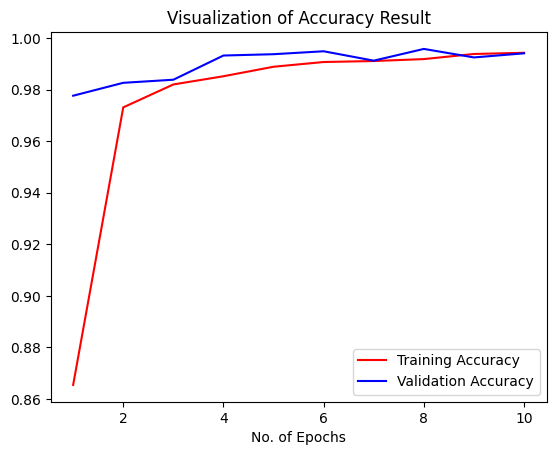

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history_eff.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_eff.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
y_pred = InceptionResNetV2_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 379s 21ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      0.99      1.00       440
                                   Apple___healthy       1.00      1.00      1.00       502
                               Blueberry___healthy       0.99      1.00      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.96      0.97       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___N

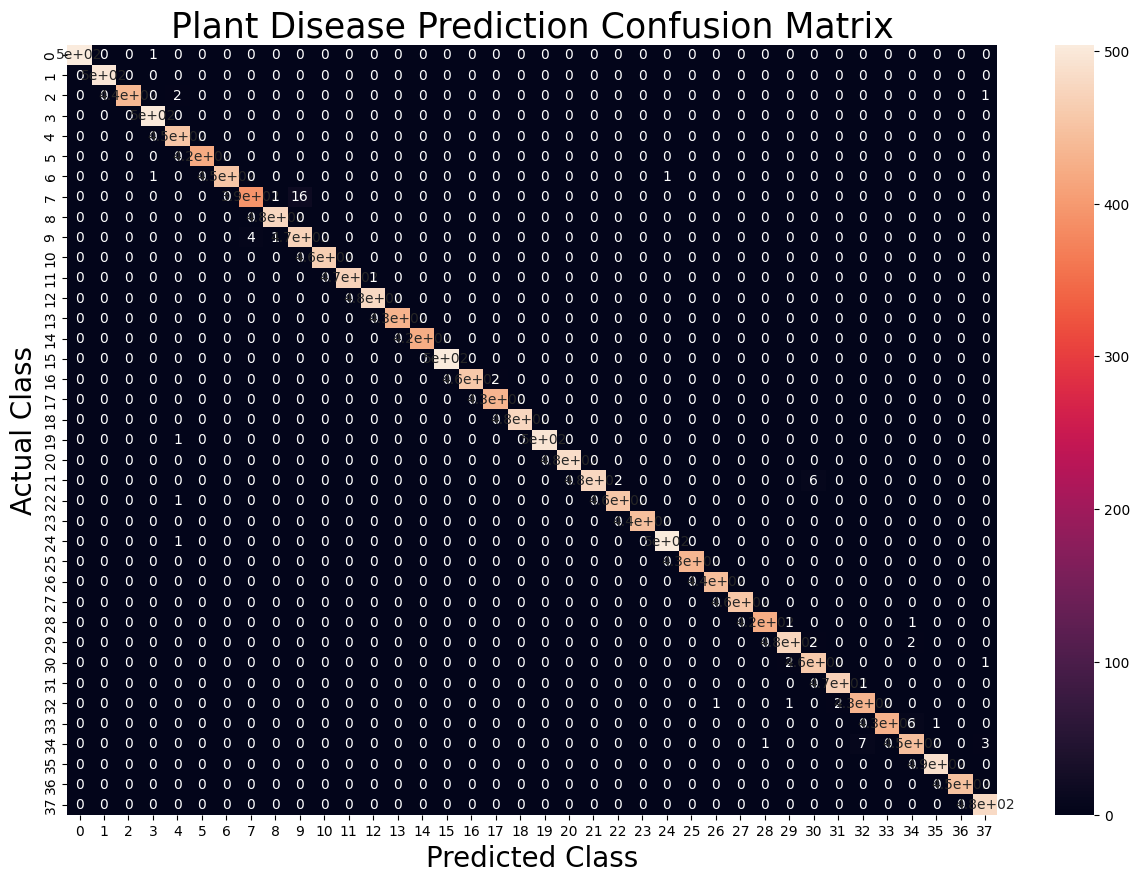

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
image_path = '/content/new-plant-diseases-dataset/test/test/PotatoHealthy2.JPG'

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch

# Make predictions
predictions = InceptionResNetV2_model.predict(input_arr)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
print(f"predicted Index - {predicted_class_index}")

# Get the predicted class name
predicted_class_name = class_name_dict[predicted_class_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
predicted Index - 22


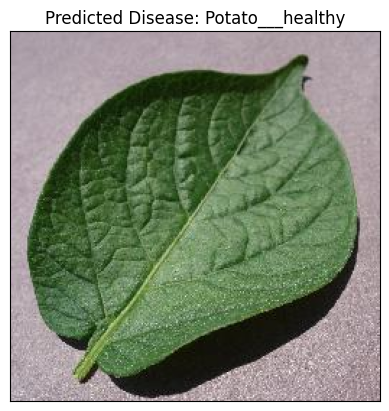

In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Predicted Disease: {predicted_class_name}")
plt.xticks([])
plt.yticks([])
plt.show()